<a href="https://colab.research.google.com/github/souravskr/ducspond_ai/blob/SVHN_CNN/SVHN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import  TensorBoard
import matplotlib.pyplot as plt
from google.colab import drive
import time

In [0]:
NAME = 'SVHN_CNN-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='drive/My Drive/Colab Notebooks/logs/{}'.format(NAME))

In [92]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Processing


## Uploading the dataset

In [0]:
train_data = loadmat('drive/My Drive/Colab Notebooks/train_32x32.mat')
test_data = loadmat ('drive/My Drive/Colab Notebooks/test_32x32.mat')

## Data Normalization
We will scale our data by making all the value between 0 to 1. To do that we will devide our training and testing dataset by 255.

In [0]:
# Splitting train and test data into X and y
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
X_train, X_test = X_train / 255.0, X_test / 255.0

#### Transposing the image arrays
Our training and testing data shape is **32, 32, 3, 73257** and **32, 32, 3, 26032** respectively. We will reverse the image arrays of the training and testing set as **73257,32, 32, 3** and **26032,32, 32, 3**.

In [0]:
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

**Now, we will  convert the class "10" as "0" so that we can get 0 to 9 classes.** 

In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)

##Training Dataset Splitting 
We will split our training data for training and validation of our model, where validation size will be **20%** of the training data.

In [0]:
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size = 0.2, random_state = 0)

# Model
Now we will build our **four layers** convolution neural network. For the **first two layers**, we will use a layer size of **32** and the for the **last two** the layer size would be **64**. **Kernel size will be 3-by-3 for all of them.**

In [0]:
model = Sequential()
# First Layer
model.add(Convolution2D(32, [3, 3], input_shape=(32, 32, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second Layer
model.add(Convolution2D(32, [3, 3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Layer
model.add(Dropout(0.25))
model.add(Convolution2D(64, [3, 3], padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Fourth Layer
model.add(Convolution2D(64, [3, 3]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth Layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512))

# Output Layer
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

###Here is the summary of our model

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_109 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_111 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_110 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_112 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 32)        0         
__________

# Training the Model
So, we have built our model, now its time to train our model with X_train and y_train. We will use **10 epochs and batch size of 128**.

In [101]:
model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size = 128, epochs= 10, verbose= 1, callbacks=[tensorboard])

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 24s 408us/step - loss: 0.9391 - acc: 0.7079 - val_loss: 0.5160 - val_acc: 0.8433
Epoch 2/10
58605/58605 [==============================] - 19s 322us/step - loss: 0.4555 - acc: 0.8607 - val_loss: 0.4579 - val_acc: 0.8633
Epoch 3/10
58605/58605 [==============================] - 19s 324us/step - loss: 0.3776 - acc: 0.8847 - val_loss: 0.3180 - val_acc: 0.9069
Epoch 4/10
58605/58605 [==============================] - 19s 324us/step - loss: 0.3341 - acc: 0.8970 - val_loss: 0.2883 - val_acc: 0.9157
Epoch 5/10
58605/58605 [==============================] - 19s 323us/step - loss: 0.3015 - acc: 0.9086 - val_loss: 0.3656 - val_acc: 0.8898
Epoch 6/10
58605/58605 [==============================] - 19s 323us/step - loss: 0.2759 - acc: 0.9157 - val_loss: 0.3348 - val_acc: 0.8989
Epoch 7/10
58605/58605 [==============================] - 19s 323us/step - loss: 0.2554 - acc: 0.9218 - val_loss: 0.

After training our model, we have got
* **93% out of sample accuracy and 24% out of sample loss** &
* **94% in-sample accuracy and 21% in-sample loss**

after 10 epochs.

# Evaluation the Model
With the ** X_test & y_test** we will evaluate our model, but before that we will organize the **y_test** categorically based on 10 classes.


In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [103]:
val_loss, val_acc = model.evaluate (X_test, y_test)

26032/26032 [==============================] - 6s 227us/step


In [104]:
print(val_loss)

0.2743990381958665


In [105]:
print(val_acc)

0.9229025814382299


###Okay, we have got **92% accuracy & 27% loss** on the testing dataset

# Prediction

In [0]:
predictions = model.predict(X_test)

In [107]:
predictions[0]

array([4.3163313e-06, 3.3675584e-05, 1.0588793e-05, 7.6603174e-04,
       5.5979099e-04, 9.8007005e-01, 9.4390484e-03, 8.8271266e-03,
       8.4358493e-05, 2.0505831e-04], dtype=float32)

In [108]:
np.argmax(predictions[5])

1

In [109]:
np.argmax(y_test[5])

1

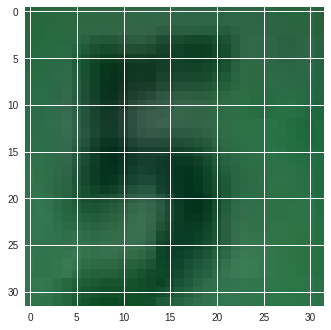

In [110]:
plt.imshow(X_test[0])

In [0]:
class_names = ['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Plotting graph
####Now we will plot a graph of a set of 10 channels, where correct and incorrect predictions will be labelled as blue and red. It will also a percentage (0 to 100) for the predicted label.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

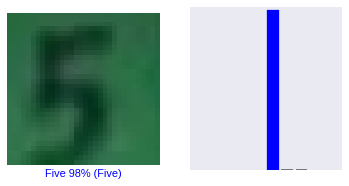

In [113]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

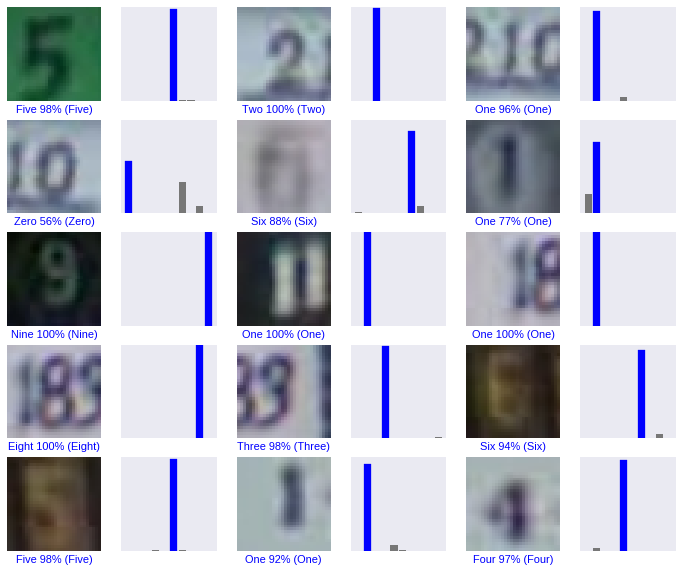

In [114]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  y_test)
plt.show()

In [0]:
model.save('SVHN_CNN.h5')